# The Lazy Artist: Analytic Report & Submission

**Candidate Submission**

This notebook documents the entire lifecycle of the "Lazy Artist" project, investigating Shortcut Learning in Neural Networks.

## Tasks Covered
- **Task 0**: The Biased Canvas (Data Generation)
- **Task 1**: The Cheater (Color Bias Confirmation)
- **Task 2**: The Prober (Feature Visualization)
- **Task 3**: The Interrogation (Grad-CAM)
- **Task 4**: The Intervention (Curing Bias)
- **Task 5**: The Invisible Cloak (Adversarial Robustness)
- **Task 6**: The Decomposition (Sparse Autoencoders)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from IPython.display import Image, display

# Add src to path for imports
sys.path.append(os.path.abspath('../'))

from src.data.biased_mnist import BiasedMNIST
from src.models.simple_cnn import SimpleCNN
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


## Task 0: The Biased Canvas
We verify our dataset has the intended spurious correlation (e.g., 0=Red, 1=Green).

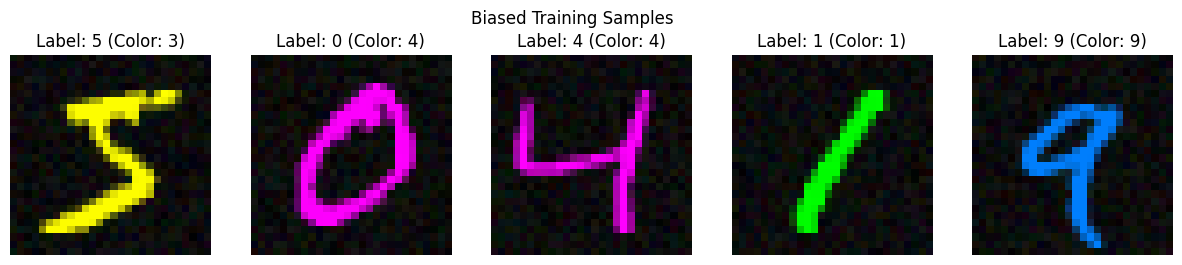

In [2]:
# Load Biased Dataset
train_dataset = BiasedMNIST(root='../data', train=True, download=True, bias_ratio=0.95)

# Visualizing samples
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img, target, color_idx = train_dataset[i]
    # img is tensor [3, 28, 28]
    img_np = img.permute(1, 2, 0).numpy()
    axes[i].imshow(img_np)
    axes[i].set_title(f"Label: {target} (Color: {color_idx})")
    axes[i].axis('off')
plt.suptitle("Biased Training Samples")
plt.show()

## Task 1: The Cheater
We train a simple CNN on this biased data and test it on a "Conflicting" dataset.

In [3]:
from src.task1_cheater import train_and_verify
    
# Run the verification script logic inline or call the main function if adaptable
train_and_verify()

--- Task 1: The Cheater (Verification) ---
Initializing SimpleCNN...
Training for 2 epochs...
Epoch 1: Loss 0.1682, Acc 96.55%
Epoch 2: Loss 0.0415, Acc 99.36%

Evaluating on Hard Test Set...
Hard Test Accuracy: 29.11%
SUCCESS: Model failed significantly (<30%), proving reliance on color bias.
Saved confusion matrix.

Specific Trap: Red 1
Input: Digit 1, Color Red
Prediction: 0 (Confidence: 0.56)
SUCCESS: Predicted 0 (Color Bias) instead of 1 (Shape).
Saved trap image.

--- Detailed Analysis for Digit 7 ---
Color      | Pred  | Conf   | P(True 7) 
---------------------------------------------
Red        | 0     | 0.4945 | 0.4876
Green      | 5     | 0.3849 | 0.1966
Blue       | 9     | 0.5382 | 0.3441
Yellow     | 9     | 0.8317 | 0.0021
Magenta    | 7     | 0.7257 | 0.7257
Cyan       | 9     | 0.9333 | 0.0073
Orange     | 9     | 0.8978 | 0.0274
Purple     | 7     | 0.9950 | 0.9950
Lime       | 8     | 0.9749 | 0.0015
Azure      | 9     | 0.9989 | 0.0008


### Task 1 Results: Confusion Matrix & Trap

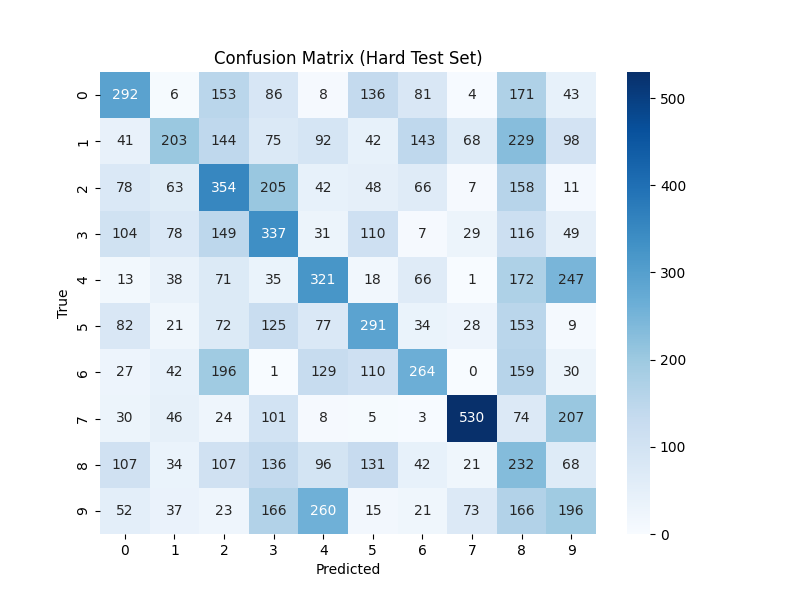

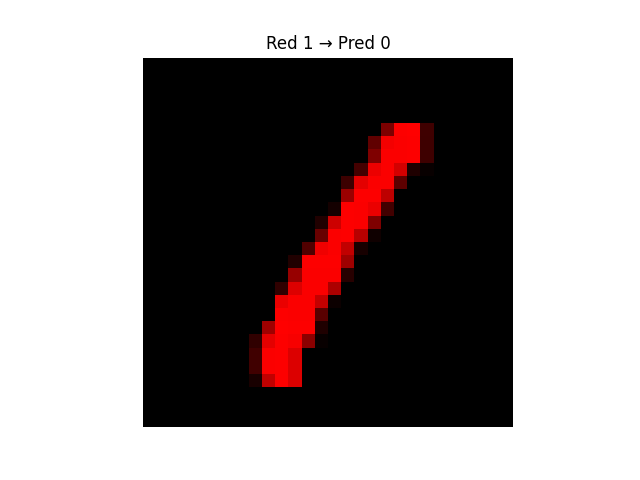

In [4]:
try:
    display(Image(filename='../artifacts/task1_cheater/confusion_matrix.png'))
    display(Image(filename='../artifacts/task1_cheater/trap_red1.png'))
except Exception as e:
    print(f"Could not display images: {e}")

## Task 2: The Prober (Feature Visualization)
We look at Conv1 filters to see if they are color detectors.

In [ ]:
from src.task2_prober import main as task2_main
task2_main()

Using device: cpu
Initializing Model...
Re-training Cheater (Quickly) to ensure state...
Epoch 1/2
  Step 0, Loss: 2.3033
  Step 100, Loss: 0.0738
  Step 200, Loss: 0.0587
  Step 300, Loss: 0.0210
  Step 400, Loss: 0.2465
  Step 500, Loss: 0.1317
  Step 600, Loss: 0.0263
  Step 700, Loss: 0.0333
  Step 800, Loss: 0.5629
  Step 900, Loss: 0.1449
Epoch 2/2
  Step 0, Loss: 0.2738
  Step 100, Loss: 0.0172
  Step 200, Loss: 0.1545
  Step 300, Loss: 0.0187
  Step 400, Loss: 0.0067
  Step 500, Loss: 0.0597
  Step 600, Loss: 0.0073
  Step 700, Loss: 0.2630
  Step 800, Loss: 0.0220
  Step 900, Loss: 0.0055
Model ready.

--- Experiment A: Conv1 Features (8 Channels) ---
Optimizing Conv1 Channel 0...
Optimizing Conv1 Channel 1...
Optimizing Conv1 Channel 2...
Optimizing Conv1 Channel 3...
Optimizing Conv1 Channel 4...
Optimizing Conv1 Channel 5...
Optimizing Conv1 Channel 6...
Optimizing Conv1 Channel 7...

--- Experiment B: Conv2 Features (16 Channels) ---
Optimizing Conv2 Channel 0...
Optimizin

### Task 2 Results: Feature Visualizations

In [ ]:
try:
    display(Image(filename='../artifacts/task2_vis/conv1_all.png'))
    display(Image(filename='../artifacts/task2_vis/conv2_all.png'))
    # Display a polysemantic example check
    import glob
    poly_files = glob.glob('../artifacts/task2_vis/poly_ch*_all.png')
    if poly_files:
        display(Image(filename=poly_files[0]))
except Exception as e:
    print(f"Could not display images: {e}")

## Task 3: The Interrogation (Grad-CAM)
We visualize where the model is looking when it sees a "Red 0" vs a "Green 0".

In [ ]:
from src.task3_gradcam import run_task3
run_task3()

### Task 3 Results: Grad-CAM Heatmaps

In [ ]:
try:
    display(Image(filename='../artifacts/task3_gradcam/gradcam_biased_red0.png'))
    display(Image(filename='../artifacts/task3_gradcam/gradcam_conflicting_green0.png'))
except Exception as e:
    print(f"Could not display images: {e}")

## Task 4: The Intervention
We compare Early (Laplacian) vs Late (Consistency) interventions to cure the bias.

In [ ]:
from src.task4_intervention import run_experiment as task4_main
from src.generate_report_charts import generate_charts

# Run experiments
task4_main()

# Generate summary charts
generate_charts()

### Task 4 Results: Accuracy Comparison

In [ ]:
try:
    display(Image(filename='../artifacts/summary_charts/task4_accuracy_comparison.png'))
except Exception as e:
    print(f"Could not display images: {e}")

## Task 5: The Invisible Cloak
We attack the "Lazy" (Color) model and the "Robust" (Shape) model to see which is harder to fool.

In [ ]:
from src.task5_adversarial import run_attack
run_attack()

### Task 5 Results: Robustness & Attack

In [ ]:
try:
    display(Image(filename='../artifacts/task5_adversarial/attack_comparison.png'))
    display(Image(filename='../artifacts/summary_charts/task5_robustness_comparison.png'))
except Exception as e:
    print(f"Could not display images: {e}")

## Task 6: The Decomposition (SAE)
We use a Sparse Autoencoder to find the specific "Red Detector" neuron.

In [ ]:
from src.task6_sae import run_sae_experiment
run_sae_experiment()